In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\dubey\OneDrive\Desktop\Presidency summer intership\mobility.csv")

# Display the first few rows of the dataframe
print(df.head())


    ID            Name  Mobility State  Population  Urban  Black  Seg_racial  \
0  100    Johnson City  0.062199    TN      576081      1  0.021       0.090   
1  200      Morristown  0.053652    TN      227816      1  0.020       0.093   
2  301  Middlesborough  0.072635    TN       66708      0  0.015       0.064   
3  302       Knoxville  0.056281    TN      727600      1  0.056       0.210   
4  401   Winston-Salem  0.044801    NC      493180      1  0.174       0.262   

   Seg_income  Seg_poverty  ...  Migration_out  Foreign_born  Social_capital  \
0       0.035        0.030  ...          0.005         0.012          -0.298   
1       0.026        0.028  ...          0.014         0.023          -0.767   
2       0.024        0.015  ...          0.012         0.007          -1.270   
3       0.092        0.084  ...          0.014         0.020          -0.222   
4       0.072        0.061  ...          0.019         0.053          -0.018   

   Religious  Violent_crime  Single_mo

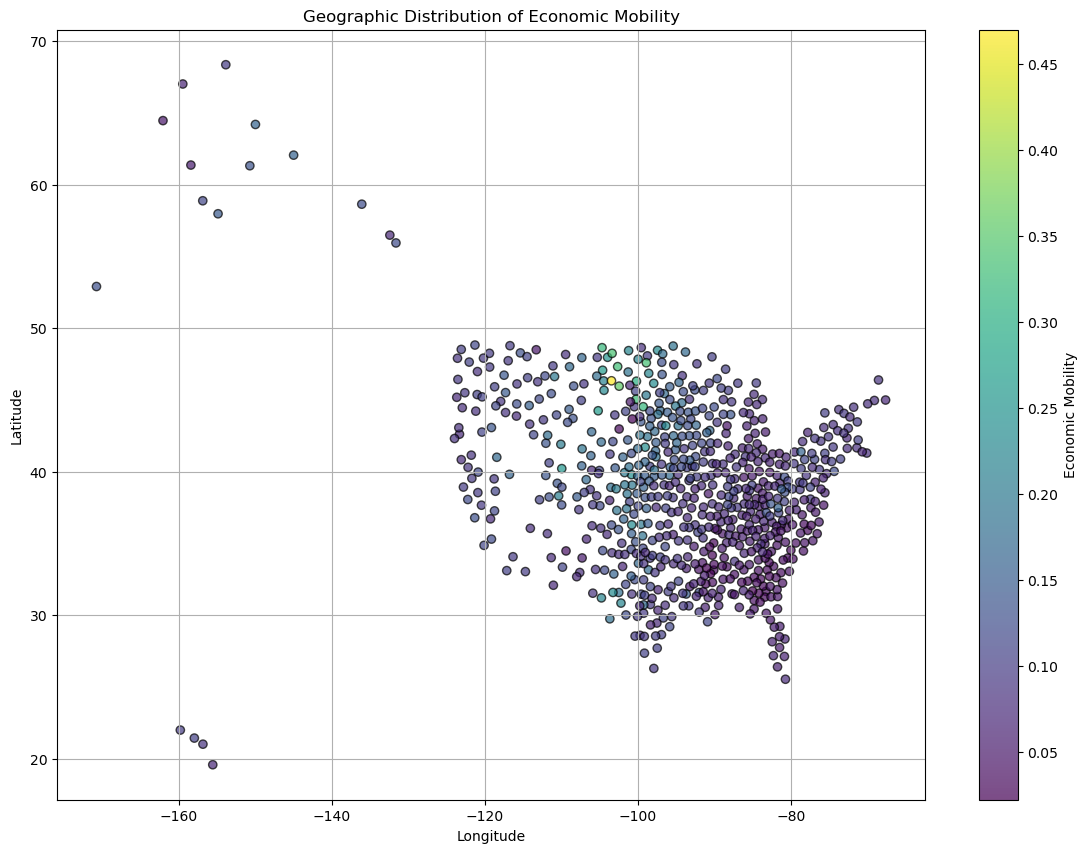

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
#df = pd.read_csv('path_to_your_file/mobility.csv')  # Replace with the path to your CSV file

# Map of economic mobility
plt.figure(figsize=(14, 10))
scatter = plt.scatter(df['Longitude'], df['Latitude'], c=df['Mobility'], cmap='viridis', edgecolor='k', alpha=0.7)
cbar = plt.colorbar(scatter)
cbar.set_label('Economic Mobility')
plt.title('Geographic Distribution of Economic Mobility')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.savefig('mobility_map.png')
plt.show()


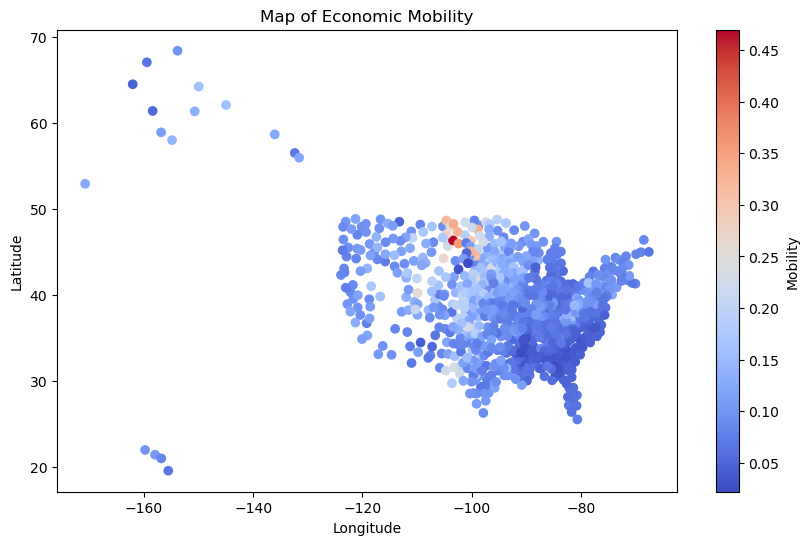

In [3]:
# Task 1: Draw a map of mobility
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Longitude'], df['Latitude'], c=df['Mobility'], cmap='coolwarm')
plt.colorbar(scatter, label='Mobility')
plt.title('Map of Economic Mobility')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

C:\Users\dubey\AppData\Local\Temp\ipykernel_4204\2705887942.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter_plot = sns.scatterplot(


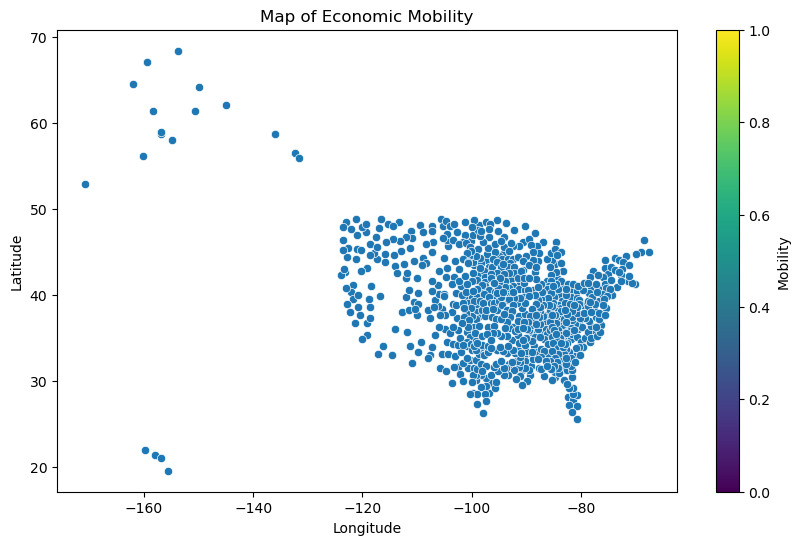

In [29]:
import warnings
import seaborn as sns
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(
    x='Longitude',
    y='Latitude',
    #hue='None',
    palette='coolwarm',
    data=df,
    legend='full'
)
plt.colorbar(scatter_plot.collections[0], label='Mobility')
plt.title('Map of Economic Mobility')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
# Correct column names based on the actual dataset
variables = ['Population', 'Seg_income', 'Seg_racial', 'Share01', 'School_spending', 'Violent_crime', 'Commute']

# Check the actual column names
print(df.columns)

In [8]:
# Check for NaNs and infinite values and handle them
import numpy as np
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=variables + ['Mobility'], inplace=True)

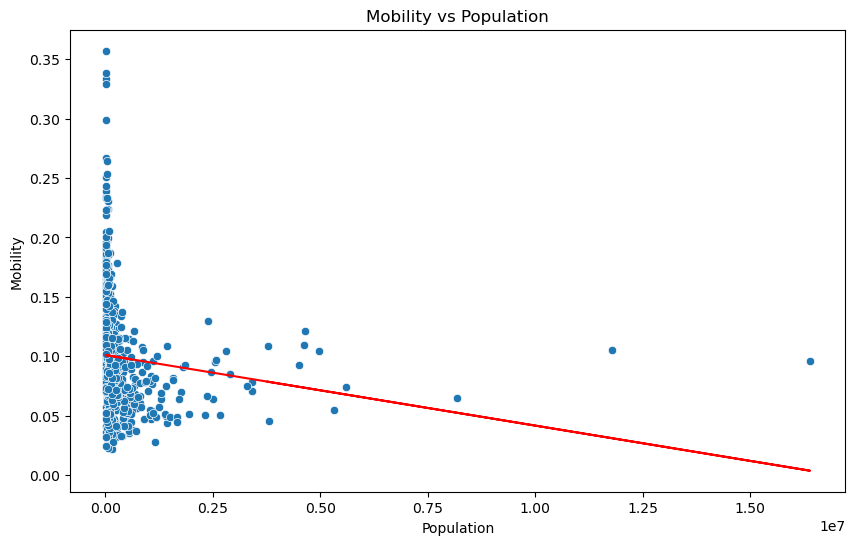

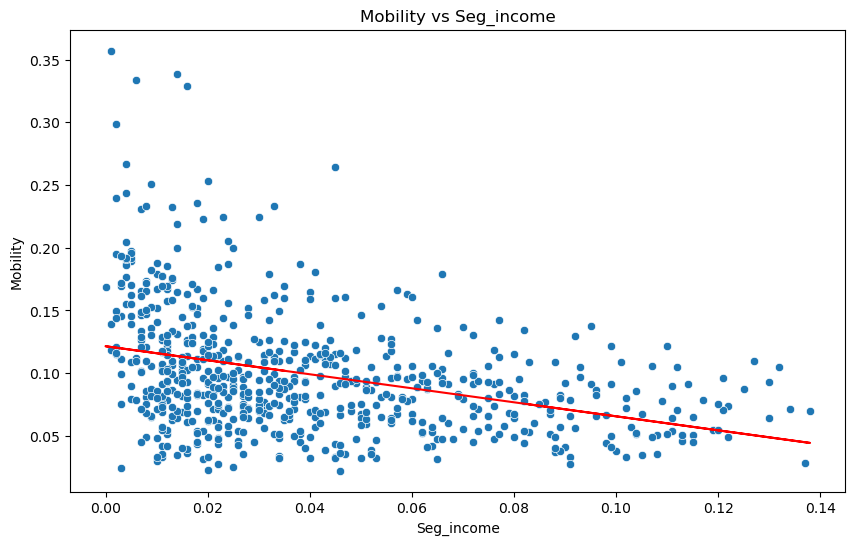

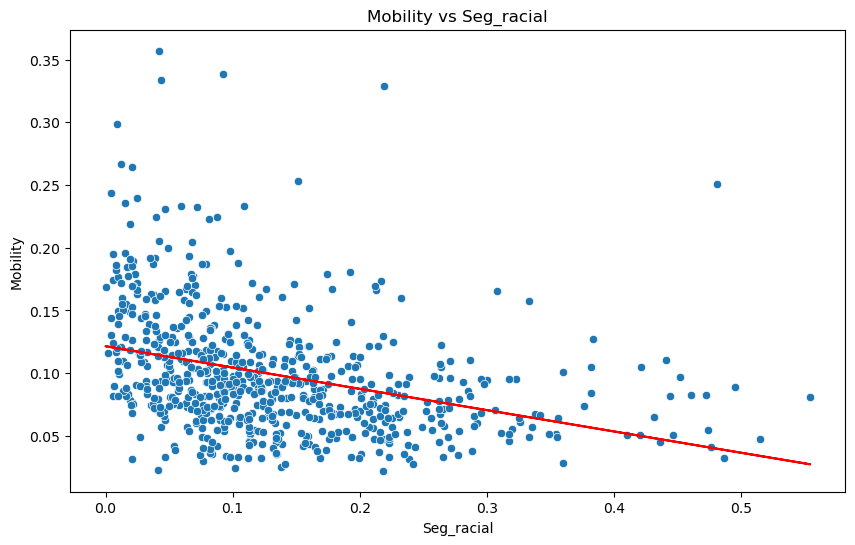

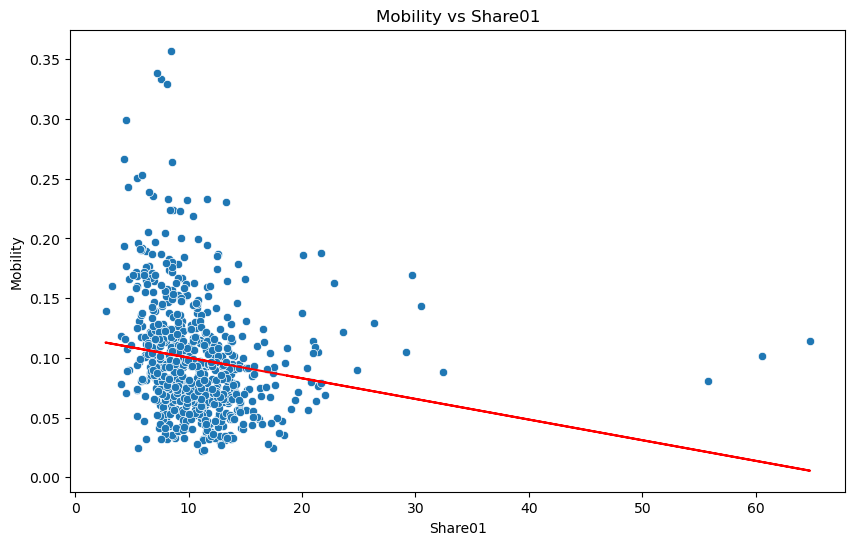

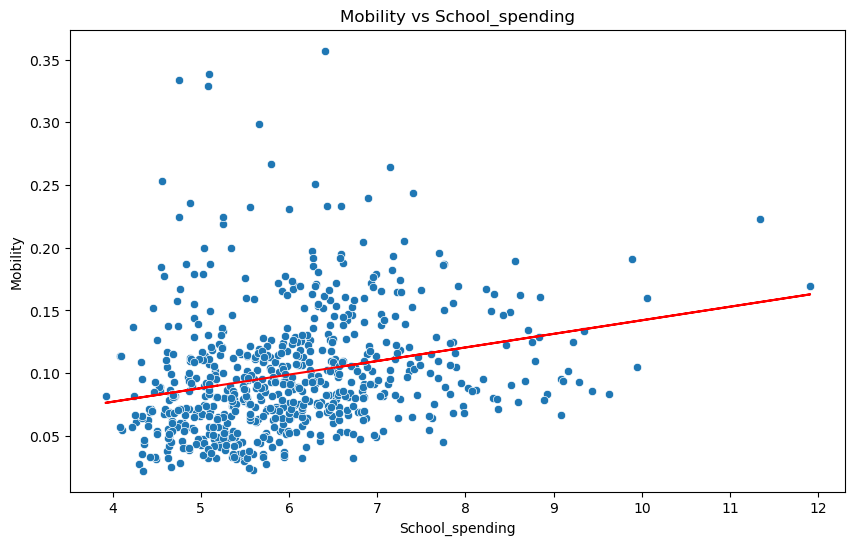

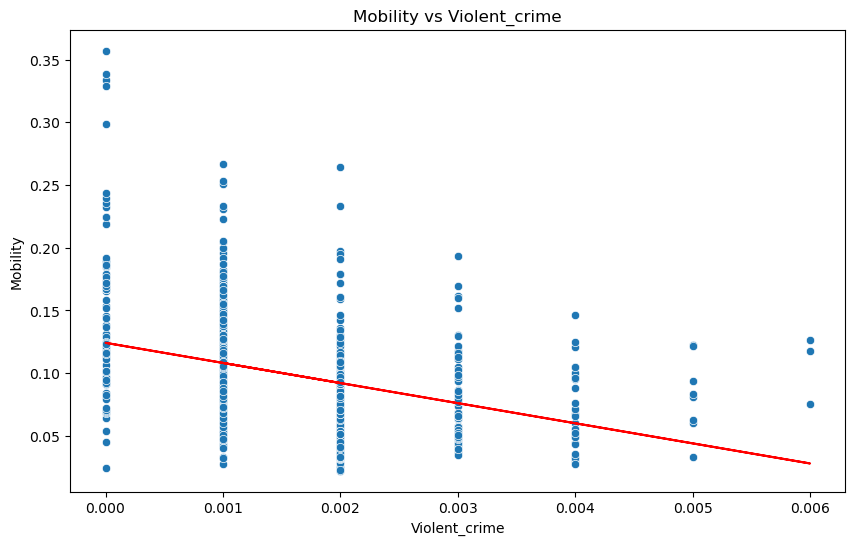

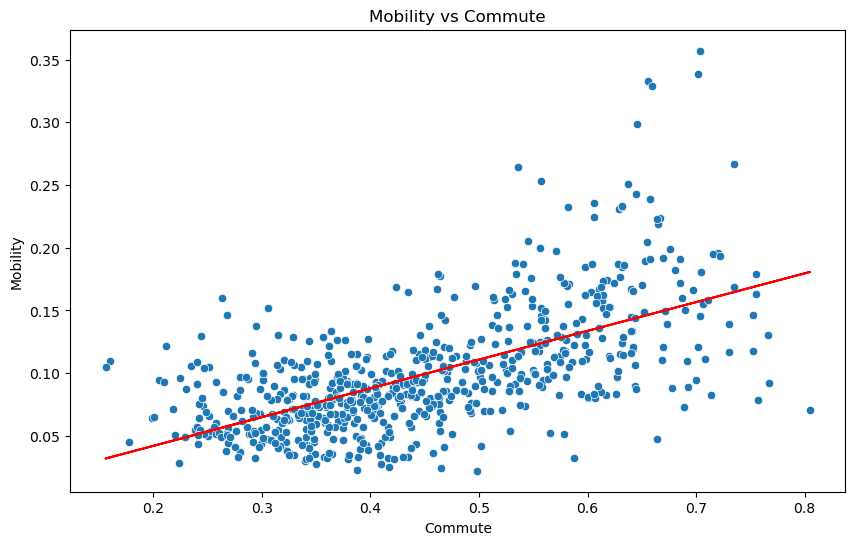

Regression Coefficients:
Population: Intercept = 0.10106168015565771, Slope = -5.939633052400857e-09
Seg_income: Intercept = 0.12130713734938446, Slope = -0.5591103513332755
Seg_racial: Intercept = 0.12130139880552597, Slope = -0.17000489893679063
Share01: Intercept = 0.11746163156271408, Slope = -0.0017274496628911541
School_spending: Intercept = 0.033644065789185405, Slope = 0.01083618657221049
Violent_crime: Intercept = 0.12402017096144975, Slope = -16.040414707280302
Commute: Intercept = -0.003951144229996402, Slope = 0.22936102293389915


In [9]:
import statsmodels.api as sm
import numpy as np

# Function to create scatter plots with regression lines
def scatter_plot_with_regression(x_var):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x_var, y='Mobility')
    
    # Fit a simple linear regression model
    X = sm.add_constant(df[x_var])
    model = sm.OLS(df['Mobility'], X).fit()
    predictions = model.predict(X)
    
    # Plot the regression line
    plt.plot(df[x_var], predictions, color='red')
    plt.title(f'Mobility vs {x_var}')
    plt.xlabel(x_var)
    plt.ylabel('Mobility')
    plt.show()
    
    # Return the regression coefficient
    return model.params

# List of variables for scatter plots
variables = ['Population', 'Seg_income', 'Seg_racial', 'Share01', 'School_spending', 'Violent_crime', 'Commute']

# Create scatter plots and collect regression coefficients
coefficients = {}
for var in variables:
    coeffs = scatter_plot_with_regression(var)
    coefficients[var] = coeffs

# Print the regression coefficients
print("Regression Coefficients:")
for var, coeffs in coefficients.items():
    print(f"{var}: Intercept = {coeffs[0]}, Slope = {coeffs[1]}")

In [10]:
# Drop unnecessary columns
df = df.drop(columns=['ID', 'Name', 'State'])

# Handle missing values
df = df.dropna()

# Prepare the data for regression
X = df.drop(columns=['Mobility'])
y = df['Mobility']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Mobility   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     31.72
Date:                Mon, 15 Jul 2024   Prob (F-statistic):           5.49e-96
Time:                        00:47:46   Log-Likelihood:                 1015.8
No. Observations:                 418   AIC:                            -1952.
Df Residuals:                     378   BIC:                            -1790.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1766      0.072      2.446      0.015       0.035       0.319
Population                 1.561e-09   2.17e-09      0.719      0.473   -2.71e-09    5.83e-09
Urban                         0.0016      0.004      0.446      0.656      -0.005       0.008
Black                         0.0886      0.025      3.487      0.001       0.039       0.139
Seg_racial                   -0.0484      0.017     -2.924      0.004      -0.081      -0.016
Seg_income                    1.0645      0.831      1.280      0.201      -0.570       2.699
Seg_poverty                  -0.8582      0.447     -1.920      0.056      -1.737       0.021
Seg_affluence                -0.3178      0.416     -0.763      0.446      -1.136       0.501
Commute                       0.0755      0.026      2.959      0.003       0.025       0.126
Income                     3.059e-07   5.98e-07      0.511      0.610   -8.71e-07    1.48e-06
Gini                          2.9291      2.888      1.014      0.311      -2.749       8.607
Share01                      -0.0294      0.029     -1.017      0.310      -0.086       0.027
Gini_99                      -3.0328      2.888     -1.050      0.294      -8.712       2.646
Middle_class                  0.0865      0.043      2.028      0.043       0.003       0.170
Local_tax_rate                0.1329      0.238      0.559      0.577      -0.335       0.601
Local_gov_spending         9.929e-07   2.76e-06      0.360      0.719   -4.44e-06    6.42e-06
Progressivity                 0.0056      0.001      5.005      0.000       0.003       0.008
EITC                         -0.0006      0.000     -1.441      0.150      -0.001       0.000
School_spending              -0.0013      0.002     -0.622      0.534      -0.005       0.003
Student_teacher_ratio        -0.0005      0.001     -0.492      0.623      -0.003       0.002
Test_scores                   0.0005      0.000      1.669      0.096   -8.19e-05       0.001
HS_dropout                   -0.1918      0.077     -2.498      0.013      -0.343      -0.041
Colleges                     -0.1053      0.072     -1.458      0.146      -0.247       0.037
Tuition                   -3.329e-08      4e-07     -0.083      0.934    -8.2e-07    7.54e-07
Graduation                   -0.0139      0.013     -1.096      0.274      -0.039       0.011
Labor_force_participation    -0.0689      0.048     -1.450      0.148      -0.162       0.025
Manufacturing                -0.1727      0.025     -6.831      0.000      -0.222      -0.123
Chinese_imports              -0.0008      0.001     -1.162      0.246      -0.002       0.001
Teenage_labor                -2.1254      1.928     -1.103      0.271      -5.916       1.665
Migration_in                 -0.0882      0.276     -0.319      0.750      

In [13]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Find Pittsburgh in the dataset
pittsburgh = df[df['Name'] == 'Pittsburgh']

# Ensure X_pittsburgh has all necessary features used in the model
features_used = ['State', 'Population', 'Urban', 'Black', 'Seg_racial', 'Seg_income',
                 'Seg_poverty', 'Seg_affluence', 'Commute', 'Income', 'Gini', 'Share01',
                 'Gini_99', 'Middle_class', 'Local_tax_rate', 'Local_gov_spending',
                 'Progressivity', 'EITC', 'School_spending', 'Student_teacher_ratio',
                 'Test_scores', 'HS_dropout', 'Colleges', 'Tuition', 'Graduation',
                 'Labor_force_participation', 'Manufacturing', 'Chinese_imports',
                 'Teenage_labor', 'Migration_in', 'Migration_out', 'Foreign_born',
                 'Social_capital', 'Religious', 'Violent_crime', 'Single_mothers',
                 'Divorced', 'Married', 'Longitude', 'Latitude']  # List of features used in model training

X_pittsburgh = pittsburgh[features_used].copy()

# Convert X_pittsburgh to numeric values
X_pittsburgh = X_pittsburgh.apply(pd.to_numeric, errors='coerce')

# Predicted mobility for Pittsburgh
X_pittsburgh = sm.add_constant(X_pittsburgh)  # Add constant for intercept
predicted_mobility = model.predict(X_pittsburgh).values[0]

# Actual mobility
actual_mobility = pittsburgh['Mobility'].values[0]

print(f"Actual Mobility of Pittsburgh: {actual_mobility}")
print(f"Predicted Mobility of Pittsburgh: {predicted_mobility}")

# Function to predict mobility with modified variables
def predict_mobility(modified_df):
    modified_df = sm.add_constant(modified_df[features_used])  # Add constant for intercept
    modified_df = modified_df.apply(pd.to_numeric, errors='coerce')
    return model.predict(modified_df).values[0]

# Double the violent crime rate
pittsburgh_double_crime = pittsburgh.copy()
pittsburgh_double_crime['Violent_crime'] *= 2
predicted_double_crime = predict_mobility(pittsburgh_double_crime)
print(f"Predicted Mobility with Double Violent Crime: {predicted_double_crime}")

# Halve the violent crime rate
pittsburgh_half_crime = pittsburgh.copy()
pittsburgh_half_crime['Violent_crime'] /= 2
predicted_half_crime = predict_mobility(pittsburgh_half_crime)
print(f"Predicted Mobility with Half Violent Crime: {predicted_half_crime}")

# Find the level of income segregation for mobility to exceed 1.0
pittsburgh_income_seg = pittsburgh.copy()
while predict_mobility(pittsburgh_income_seg) < 1.0:
    pittsburgh_income_seg['Seg_income'] -= 0.01

print(f"Income segregation for mobility to exceed 1.0: {pittsburgh_income_seg['Seg_income'].values[0]}")

# Find the income share of the top 1% for mobility to fall to 0.0
pittsburgh = df[df['Name'] == 'Pittsburgh'].copy()  # Reset to original Pittsburgh data
while predict_mobility(pittsburgh) > 0.0:
    pittsburgh['Share01'] += 0.01

print(f"Income share of the top 1% for mobility to fall to 0.0: {pittsburgh['Share01'].values[0]}")

Actual Mobility of Pittsburgh: 0.09514869
Predicted Mobility of Pittsburgh: nan
Predicted Mobility with Double Violent Crime: nan
Predicted Mobility with Half Violent Crime: nan
Income segregation for mobility to exceed 1.0: 0.081
Income share of the top 1% for mobility to fall to 0.0: 13.848


In [21]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Assume df and model are already defined

# National mobility level weighted by population
national_mobility = np.average(df['Mobility'], weights=df['Population'])
print(f"National Mobility Level: {national_mobility}")

# Effect of free college
df_free_college = df.copy()
df_free_college['Colleges'] = 0  # Make sure to use the correct column name for tuition

# Ensure all columns used in prediction are numeric and add constant
features_used = ['Population', 'Urban', 'Black', 'Seg_racial', 'Seg_income',
                 'Seg_poverty', 'Seg_affluence', 'Commute', 'Income', 'Gini', 'Share01',
                 'Gini_99', 'Middle_class', 'Local_tax_rate', 'Local_gov_spending',
                 'Progressivity', 'EITC', 'School_spending', 'Student_teacher_ratio',
                 'Test_scores', 'HS_dropout', 'Colleges', 'Tuition', 'Graduation',
                 'Labor_force_participation', 'Manufacturing', 'Chinese_imports',
                 'Teenage_labor', 'Migration_in', 'Migration_out', 'Foreign_born',
                 'Social_capital', 'Religious', 'Violent_crime', 'Single_mothers',
                 'Divorced', 'Married', 'Longitude', 'Latitude']

# Add constant to both original and modified data frames
X_original = sm.add_constant(df[features_used].apply(pd.to_numeric, errors='coerce'))
X_free_college = sm.add_constant(df_free_college[features_used].apply(pd.to_numeric, errors='coerce'))

# Predict mobility for original and modified data frames
predicted_mobility_original = model.predict(X_original)
predicted_mobility_free_college = model.predict(X_free_college)

# Changes in predicted mobility
changes = predicted_mobility_free_college - predicted_mobility_original

print(f"Minimum change: {changes.min()}")
print(f"Median change: {np.median(changes)}")
print(f"Mean change: {changes.mean()}")
print(f"Maximum change: {changes.max()}")

# Change in national mobility level
new_national_mobility = np.average(predicted_mobility_free_college, weights=df['Population'])
print(f"Change in National Mobility Level: {new_national_mobility - national_mobility}")

# 95% confidence interval for change in national mobility level
std_change = changes.std()
conf_interval = 1.96 * std_change / np.sqrt(len(changes))
print(f"95% Confidence Interval: {new_national_mobility - national_mobility - conf_interval} to {new_national_mobility - national_mobility + conf_interval}")


National Mobility Level: nan
Minimum change: 0.00042110667926076317
Median change: nan
Mean change: 0.002537218114158666
Maximum change: 0.02558223076509354
Change in National Mobility Level: nan
95% Confidence Interval: nan to nan


In [27]:
import warnings

# Suppress only FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Your code here

# Assuming model and df are already defined and model is fitted

# Extract t-statistics
t_stats = model.tvalues.drop('const')
t_stats_sorted = t_stats.abs().sort_values(ascending=False)

# Print the ranking by t-statistics
print("Ranking by t-statistics:")
print(t_stats_sorted)

# Calculate the expected change in mobility from a one standard deviation change
std_devs = df.drop(columns=['Mobility']).std()
coefficients = model.params.drop('const')
expected_changes = coefficients * std_devs

# Print the ranking by expected changes
print("Ranking by expected changes in mobility:")
print(expected_changes.abs().sort_values(ascending=False))

# Align indices before comparing the rankings
common_features = t_stats_sorted.index.intersection(expected_changes.index)

t_stats_sorted_aligned = t_stats_sorted[common_features]
expected_changes_sorted = expected_changes[common_features].abs().sort_values(ascending=False)

# Compare the rankings
rank_diff = t_stats_sorted_aligned.index != expected_changes_sorted.index
print("Difference in rankings:", rank_diff) 

Ranking by t-statistics:
Manufacturing                6.830691
Religious                    5.256151
Progressivity                5.005029
Single_mothers               4.164212
Black                        3.487032
Commute                      2.958571
Seg_racial                   2.923962
Latitude                     2.680083
HS_dropout                   2.497644
Violent_crime                2.156179
Foreign_born                 2.148446
Middle_class                 2.028207
Seg_poverty                  1.919700
Test_scores                  1.669127
Migration_out                1.553149
Colleges                     1.458310
Labor_force_participation    1.449562
EITC                         1.441030
Married                      1.329309
Seg_income                   1.280484
Chinese_imports              1.162098
Teenage_labor                1.102643
Graduation                   1.096088
Gini_99                      1.050105
Share01                      1.016630
Gini                     

In [2]:
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure all columns used in the model are numeric and handle missing values
df_numeric = df.select_dtypes(include=[float, int]).dropna()

# Separate the target variable and features
X = df_numeric.drop(columns=['Mobility'])
y = df_numeric['Mobility']

# Adding a constant to the model
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Predicted mobility
df['Predicted_Mobility'] = model.predict(sm.add_constant(df_numeric.drop(columns=['Mobility'])))

# Residuals
df['Residuals'] = df['Mobility'] - df['Predicted_Mobility']

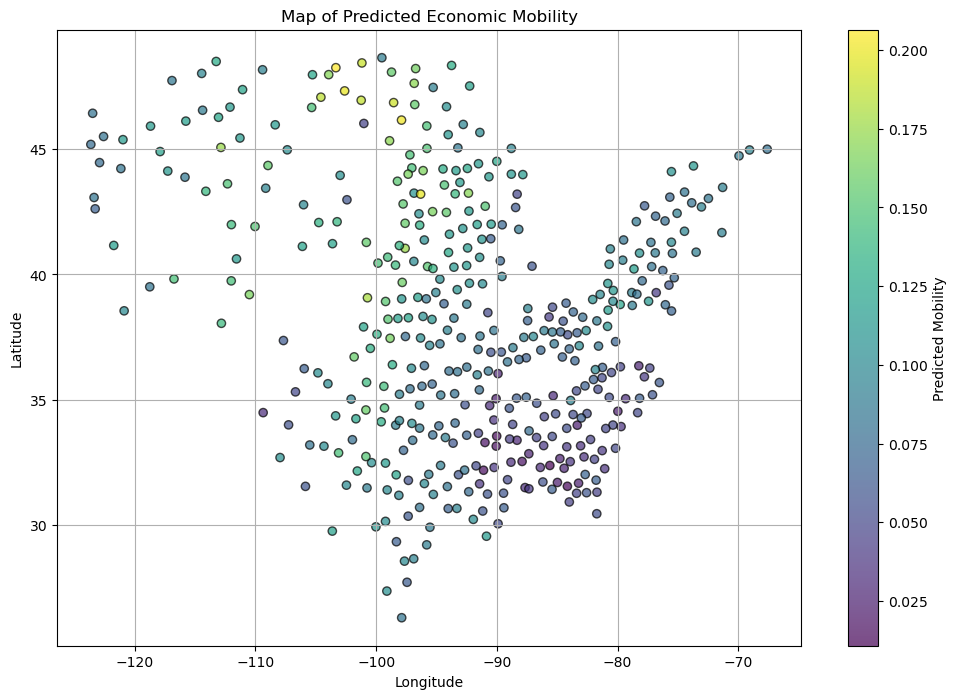

In [3]:
# Map of predicted mobility
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Longitude'], df['Latitude'], c=df['Predicted_Mobility'], cmap='viridis', edgecolor='k', alpha=0.7)
cbar = plt.colorbar(scatter)
cbar.set_label('Predicted Mobility')
plt.title('Map of Predicted Economic Mobility')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

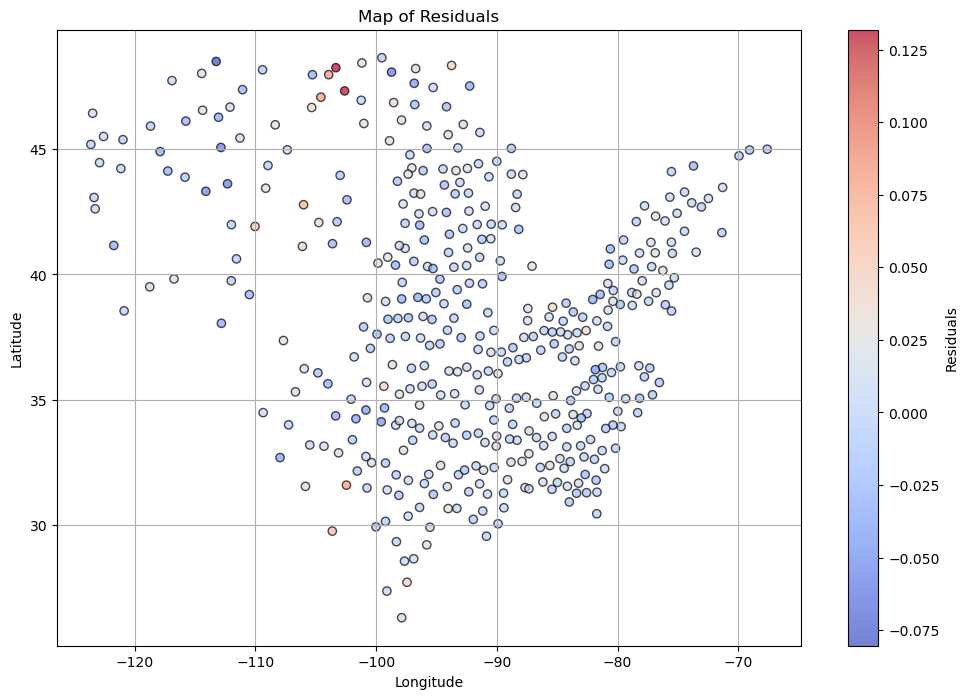

In [4]:
# Map of residuals
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Longitude'], df['Latitude'], c=df['Residuals'], cmap='coolwarm', edgecolor='k', alpha=0.7)
cbar = plt.colorbar(scatter)
cbar.set_label('Residuals')
plt.title('Map of Residuals')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [9]:
# Communities with largest positive and negative residuals
largest_positive_residuals = df.nlargest(5, 'Residuals')
largest_negative_residuals = df.nsmallest(5, 'Residuals')

print("Largest Positive Residuals:")
print(largest_positive_residuals[['Name', 'Residuals']])

print("Largest Negative Residuals:")
print(largest_negative_residuals[['Name', 'Residuals']])


Largest Positive Residuals:
             Name     Residuals
444        Gordon -6.515205e-13
38      Kosciusko -6.685832e-13
386    Wolf Point -6.910444e-13
66   West Liberty -7.138040e-13
556      Beeville -7.227552e-13
Largest Negative Residuals:
              Name     Residuals
265       New York -4.017356e-11
335        Chicago -2.836736e-11
268   Philadelphia -1.972615e-11
165  Washington DC -1.669573e-11
570        Houston -1.594556e-11


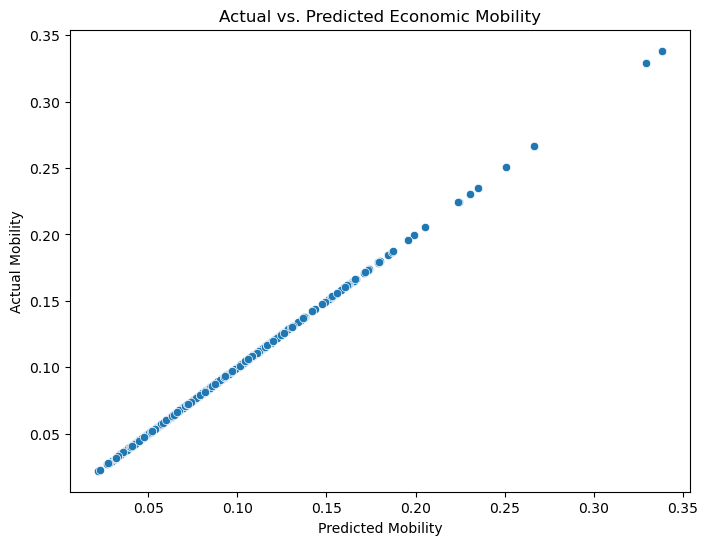

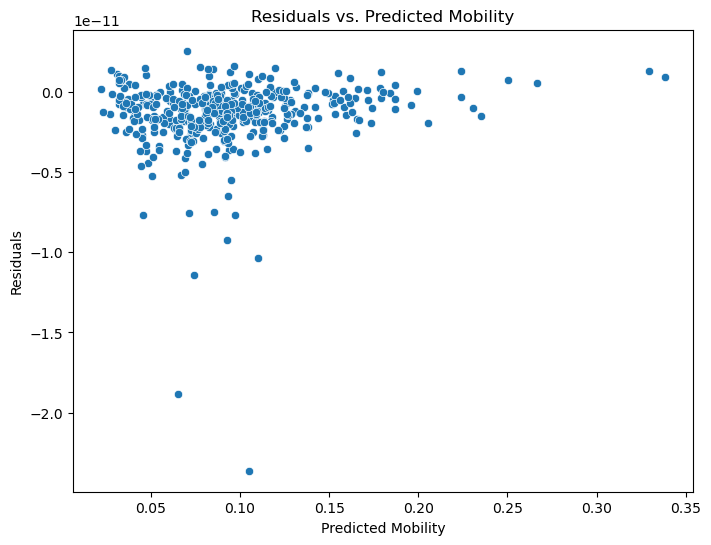

In [4]:
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure all columns used in the model are numeric and handle missing values
df_numeric = df.select_dtypes(include=[float, int]).dropna()

# Separate the target variable and features
X = df_numeric.drop(columns=['Mobility'])
y = df_numeric['Mobility']

# Adding a constant to the model
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Predicted mobility
df['Predicted_Mobility'] = model.predict(sm.add_constant(df_numeric.drop(columns=['Mobility'])))

# Residuals
df['Residuals'] = df['Mobility'] - df['Predicted_Mobility']

# Scatter plot of actual vs. predicted mobility
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model.predict(X), y=y)
plt.title('Actual vs. Predicted Economic Mobility')
plt.xlabel('Predicted Mobility')
plt.ylabel('Actual Mobility')
plt.show()

# Scatter plot of residuals vs. predicted mobility
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model.predict(X), y=df['Residuals'])
plt.title('Residuals vs. Predicted Mobility')
plt.xlabel('Predicted Mobility')
plt.ylabel('Residuals')
plt.show()

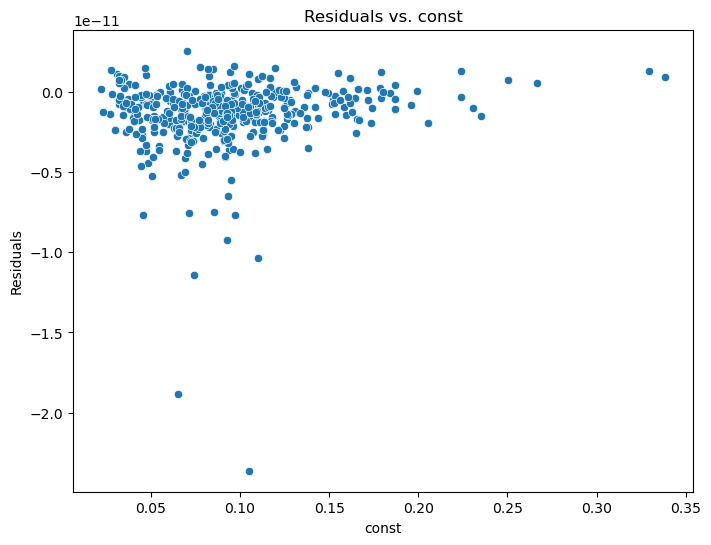

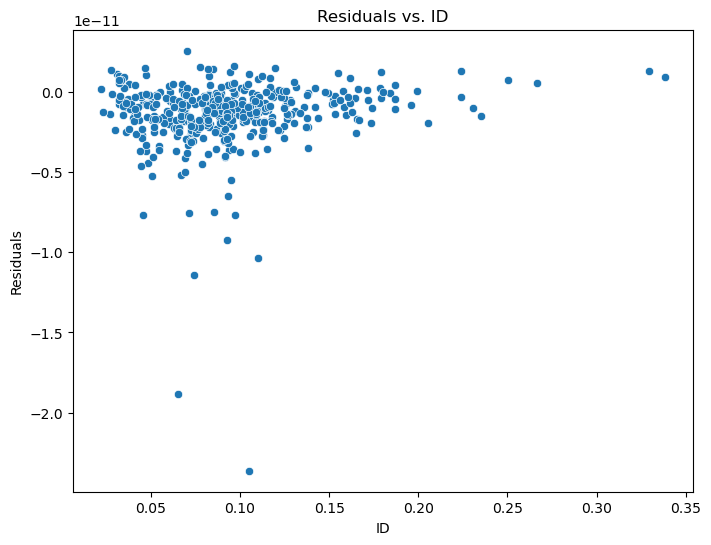

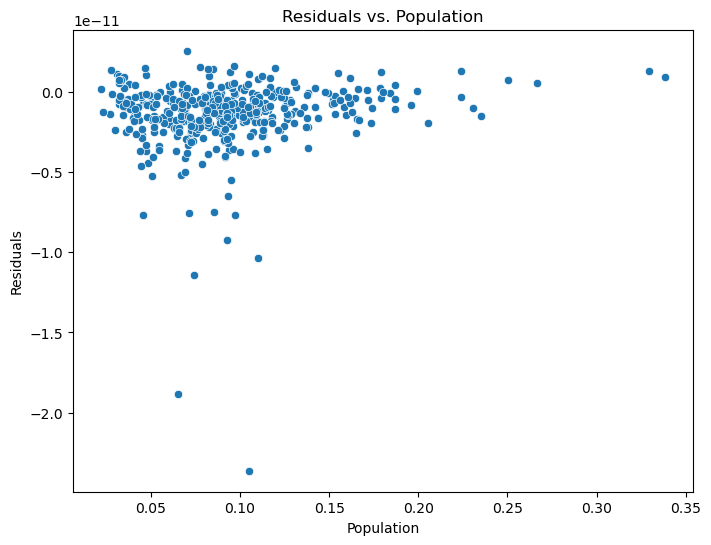

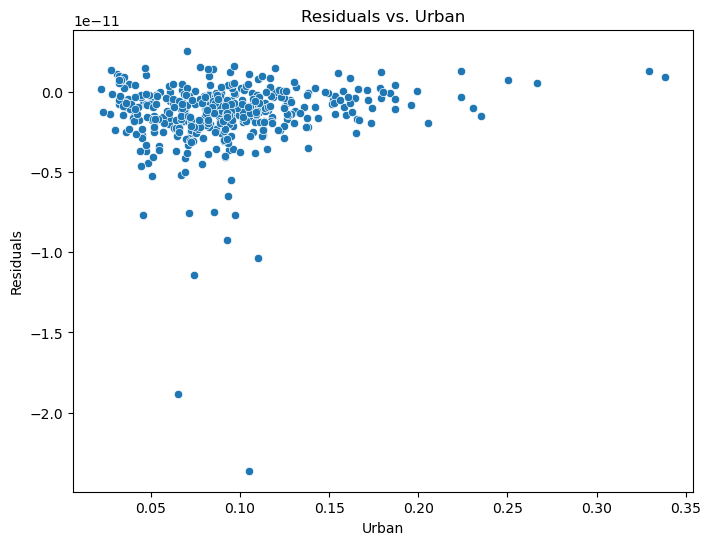

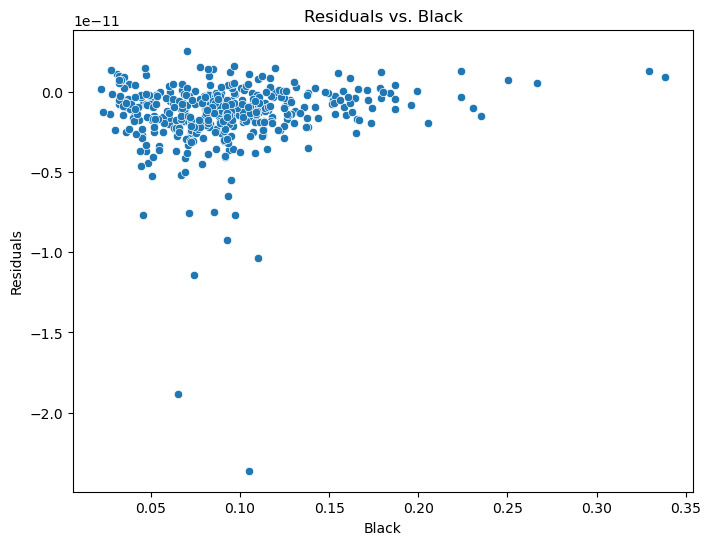

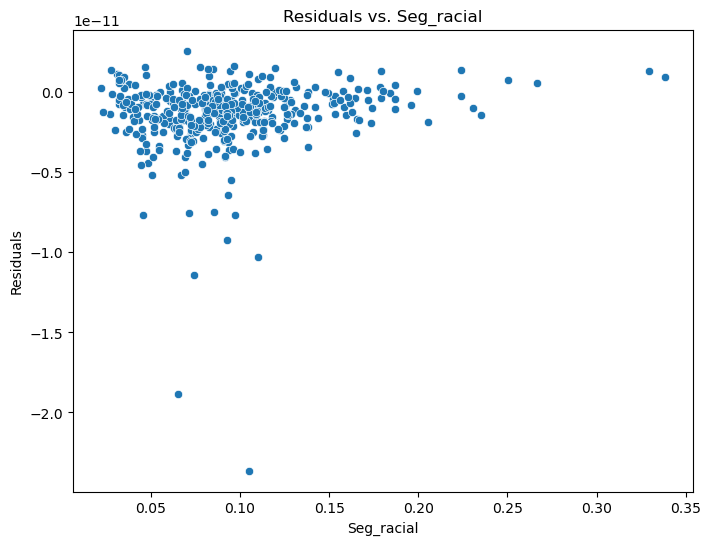

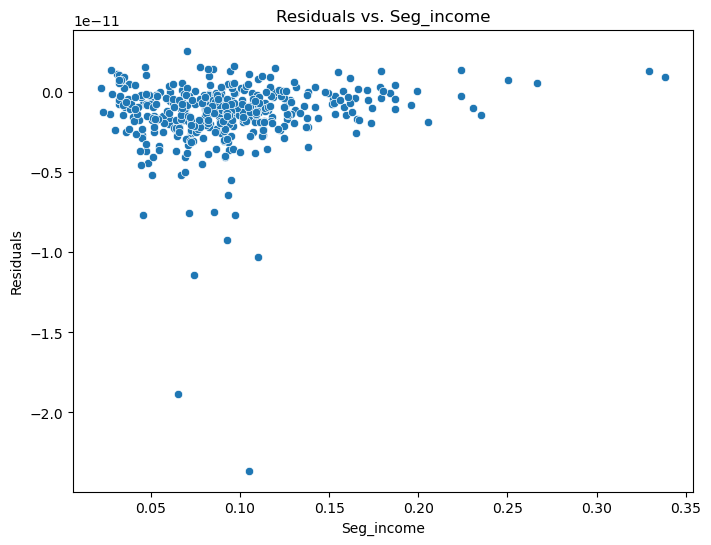

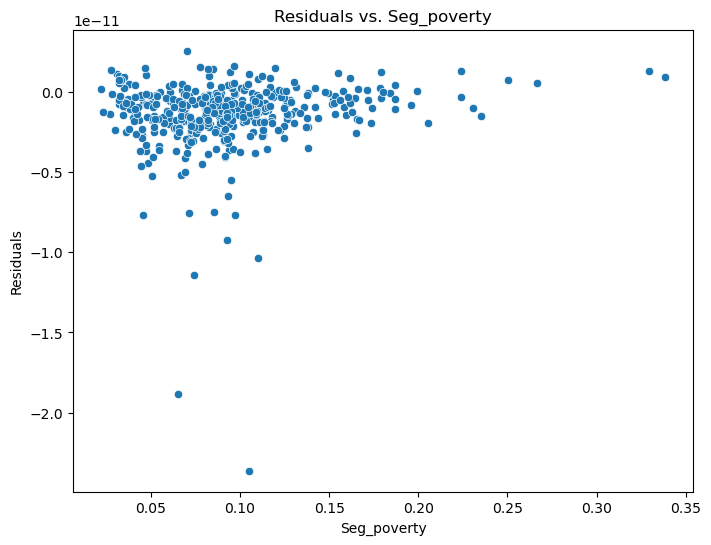

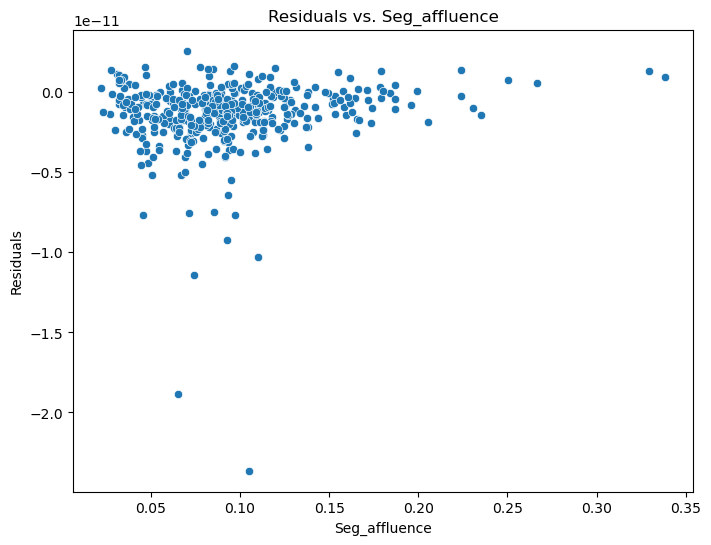

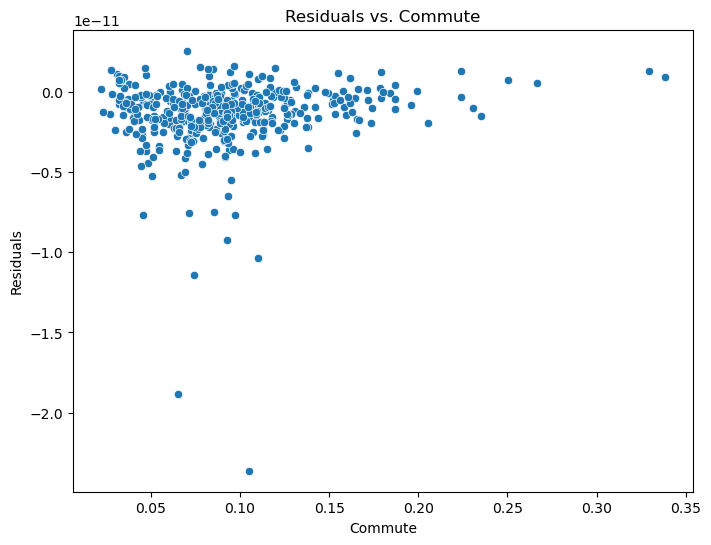

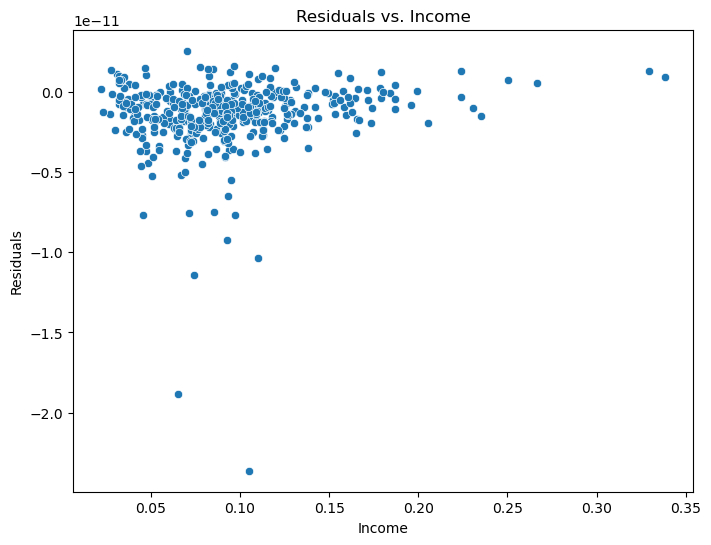

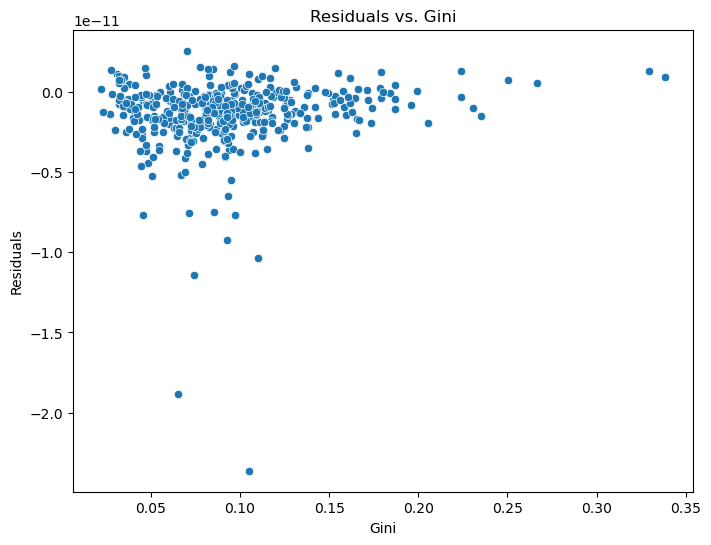

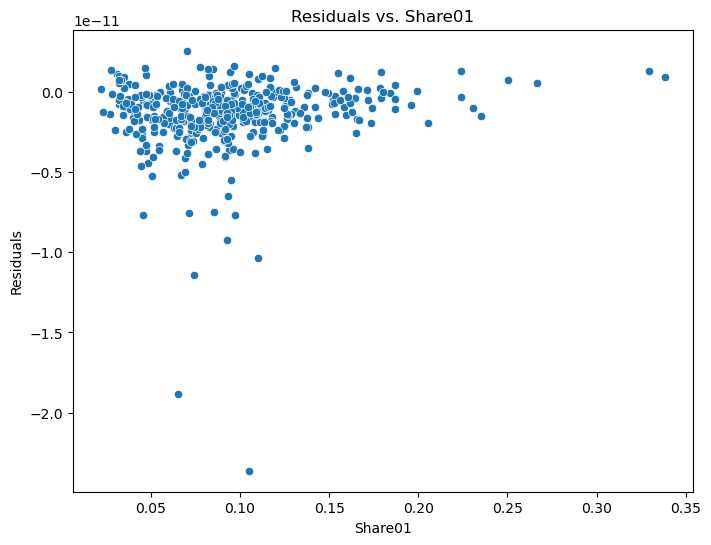

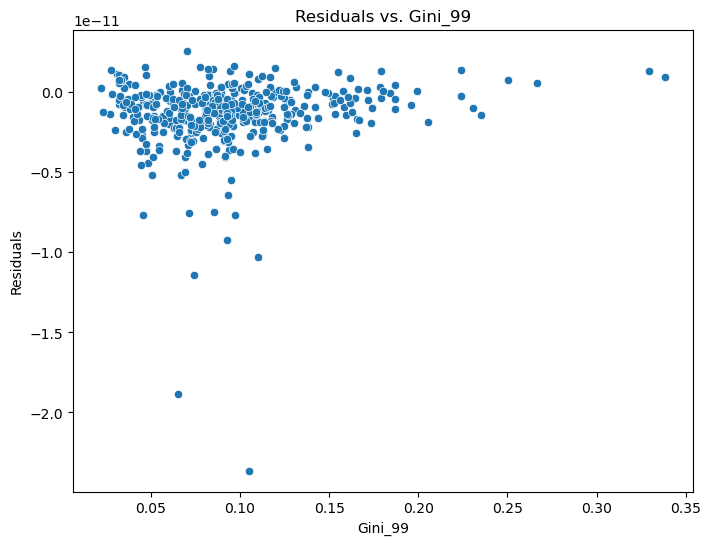

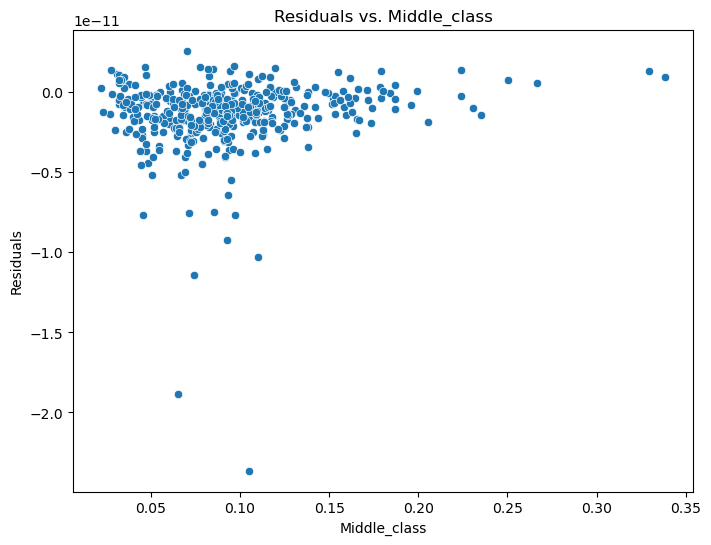

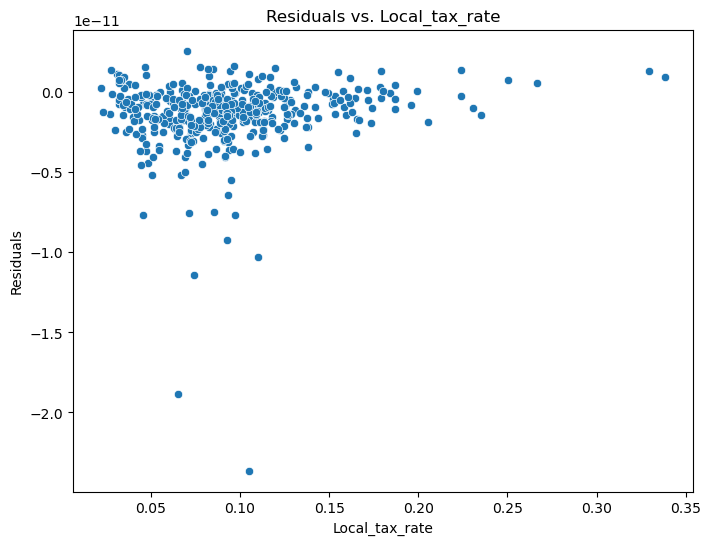

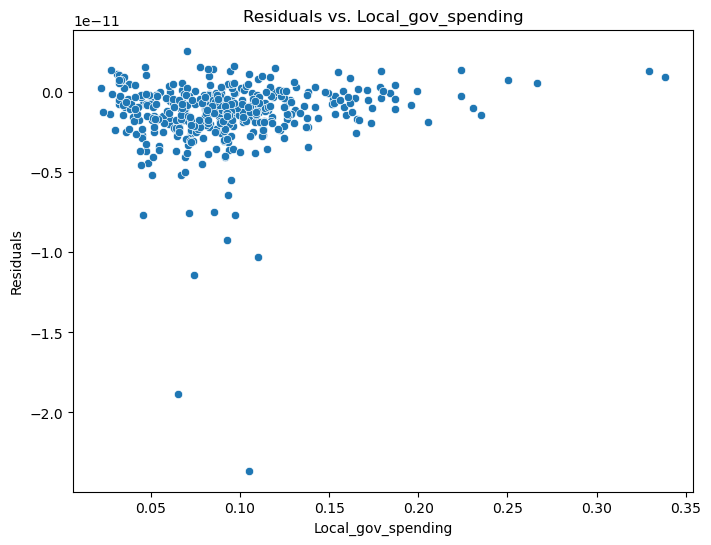

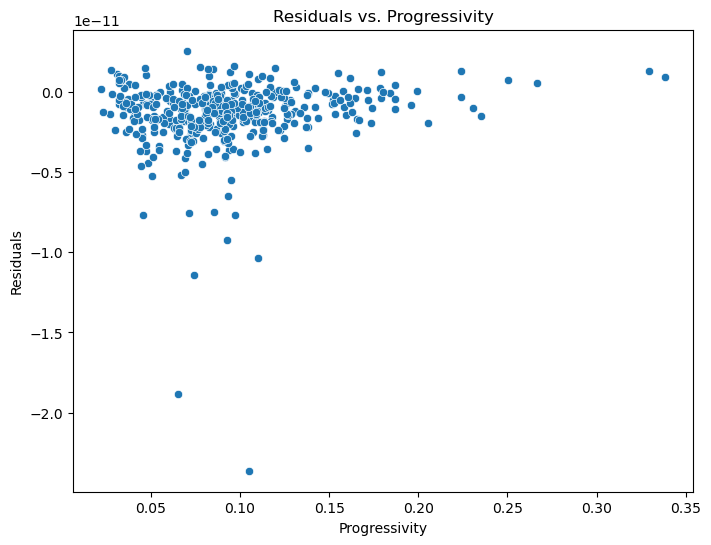

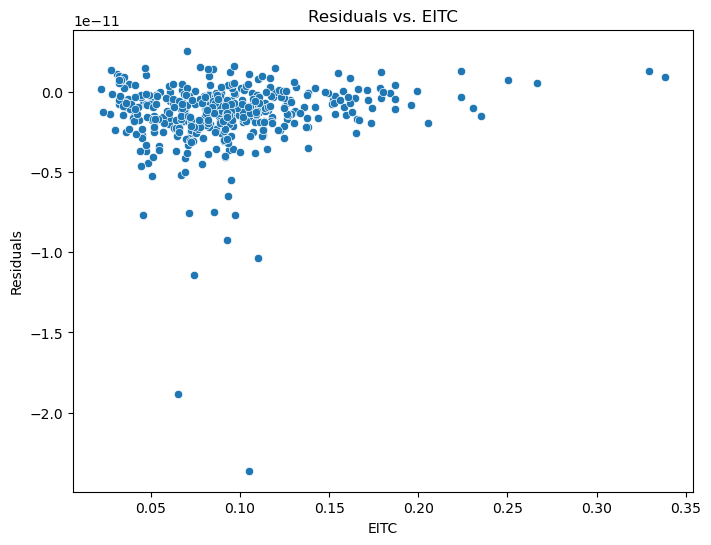

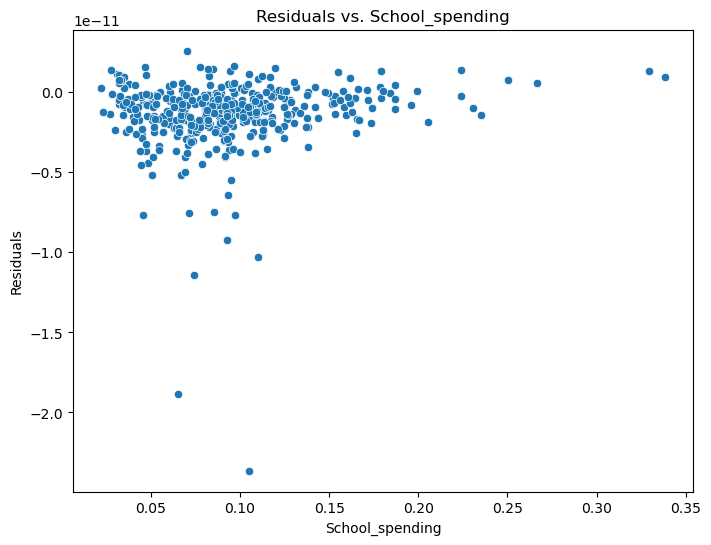

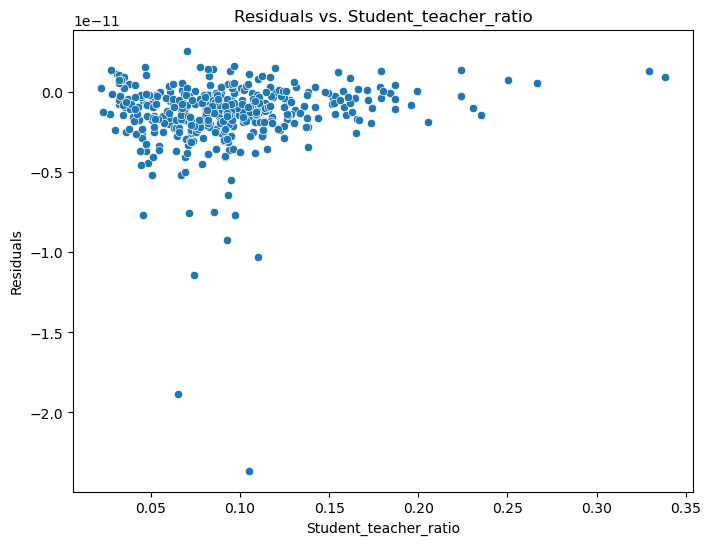

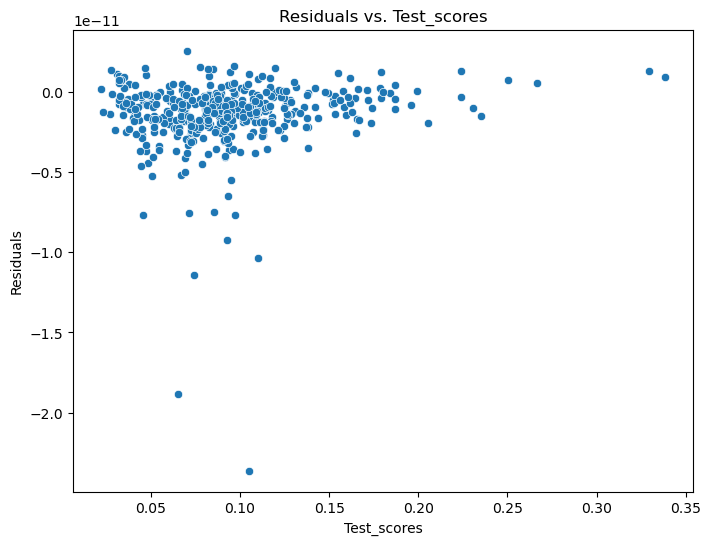

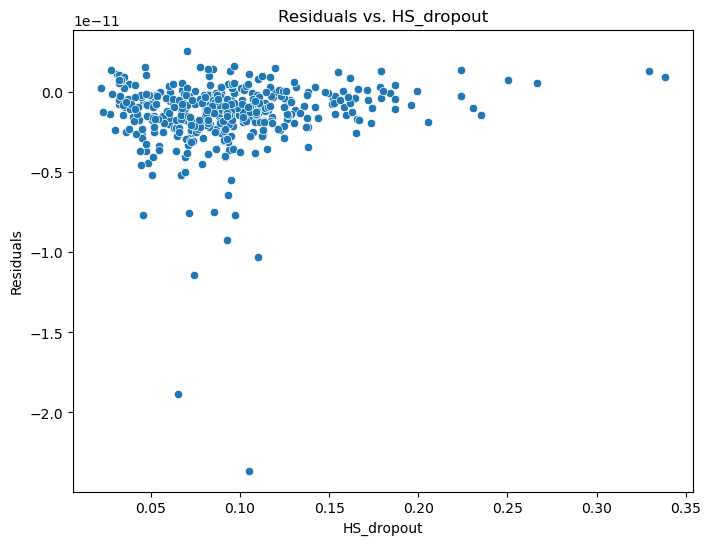

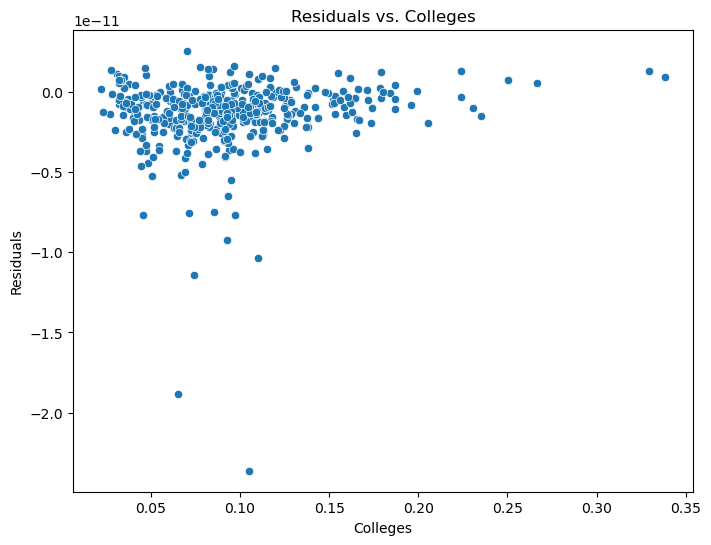

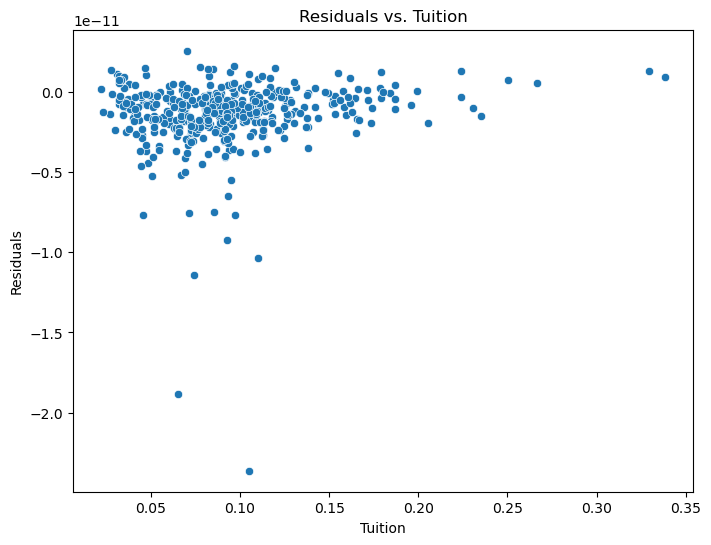

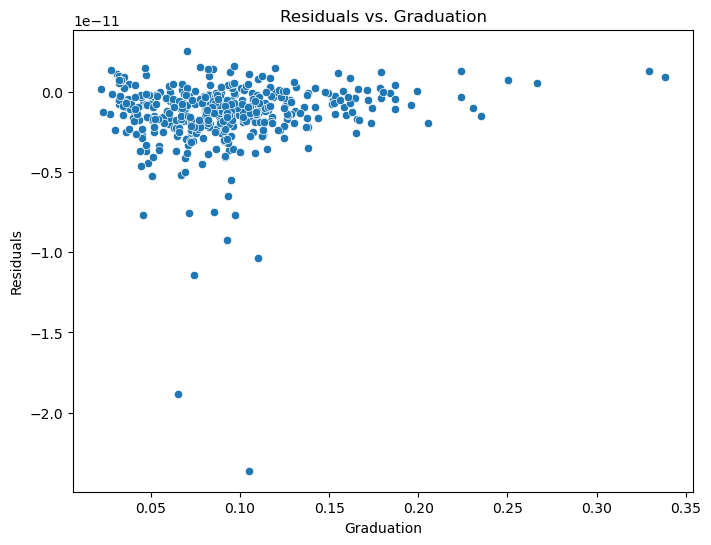

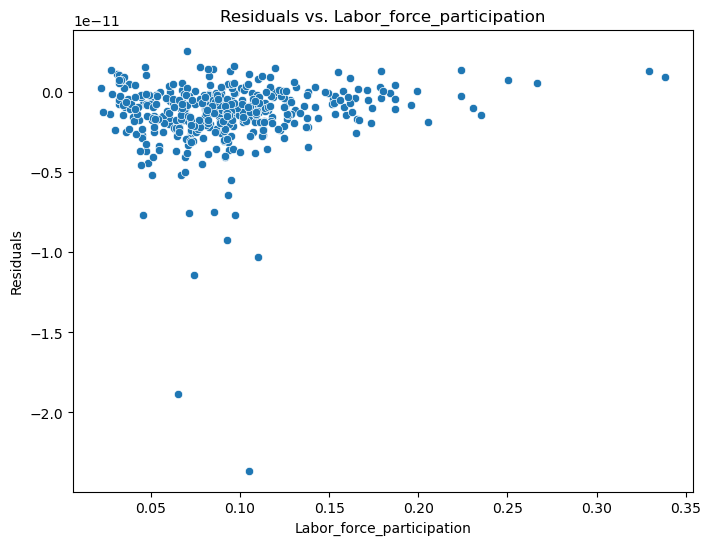

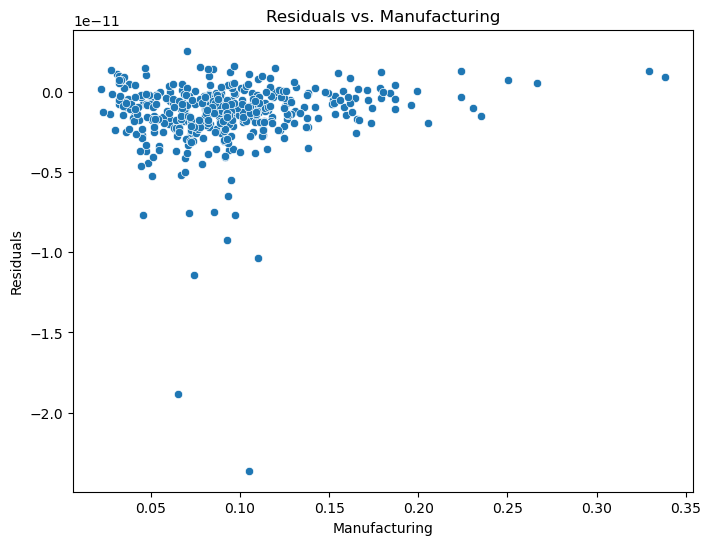

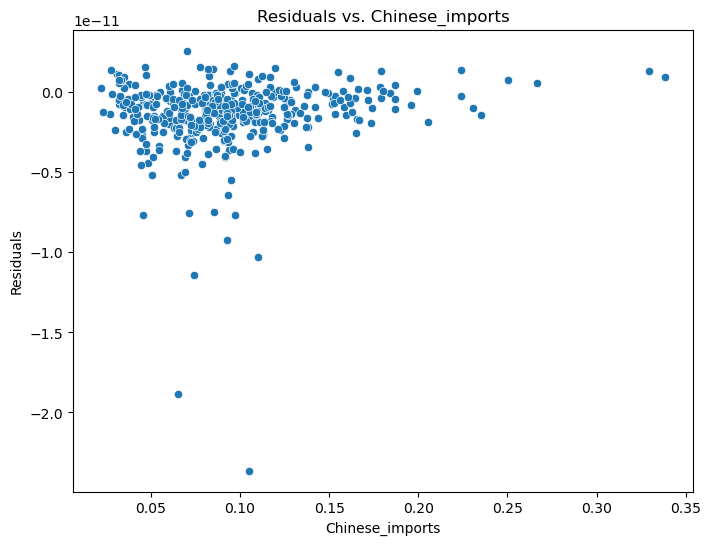

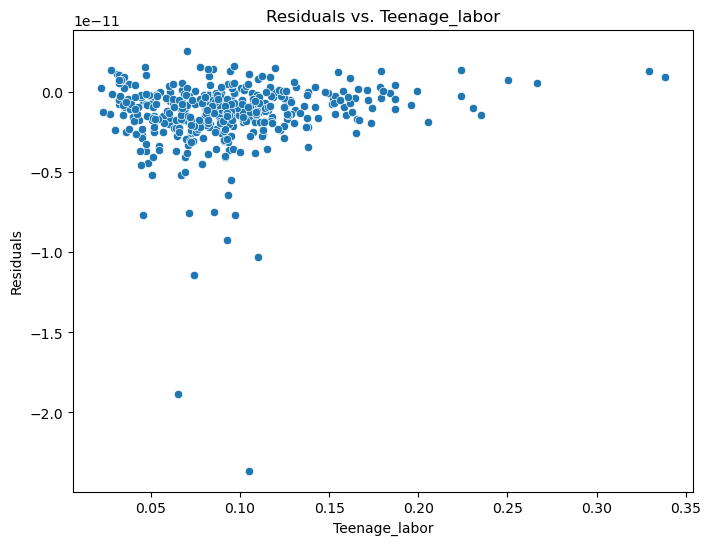

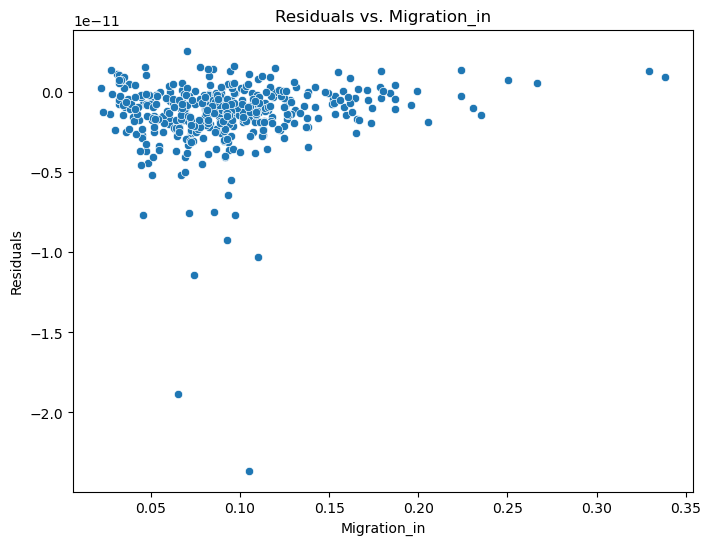

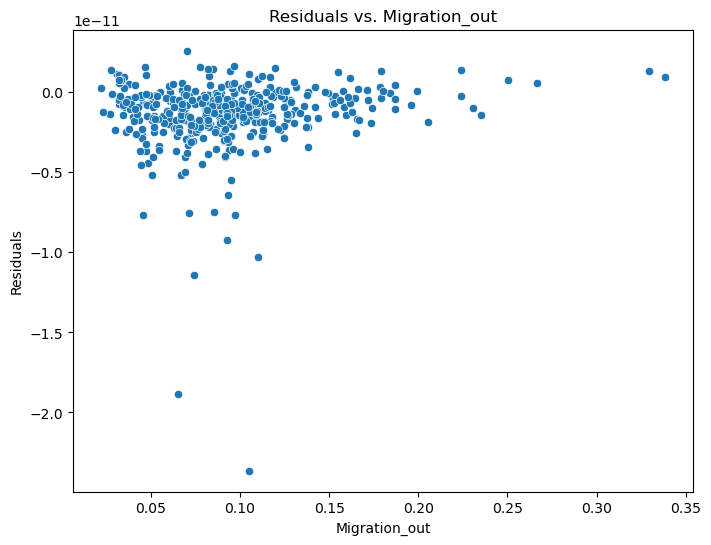

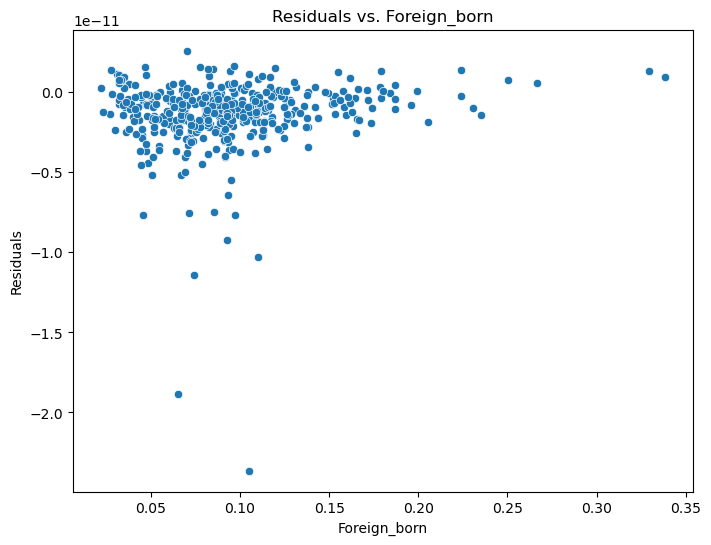

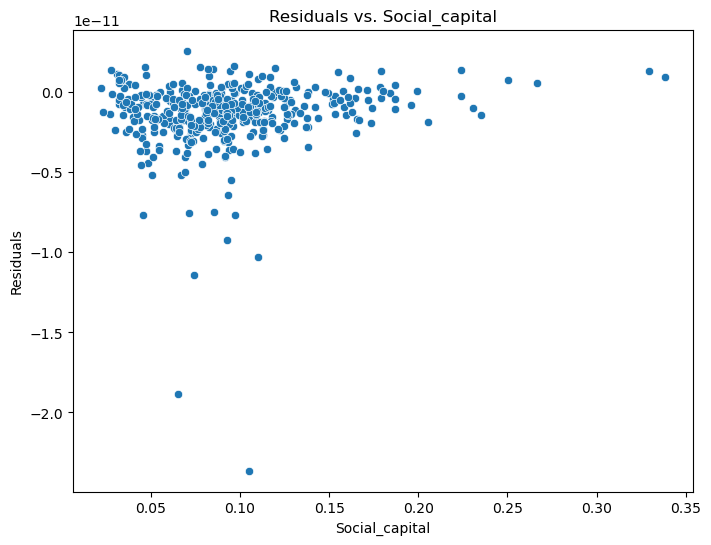

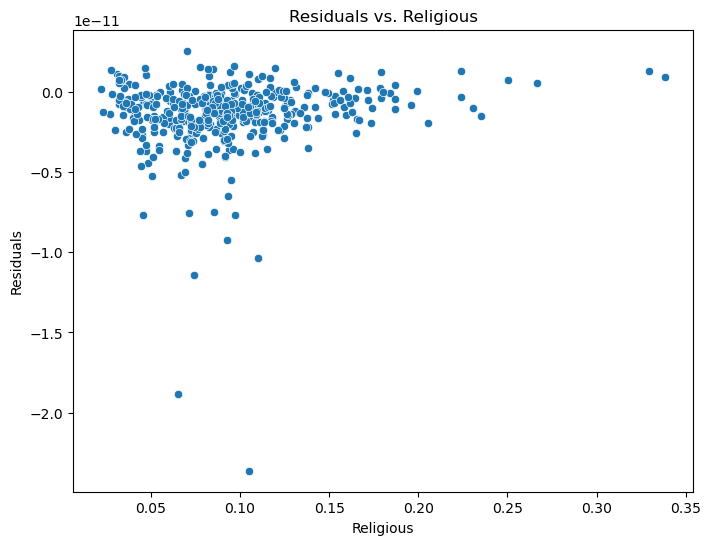

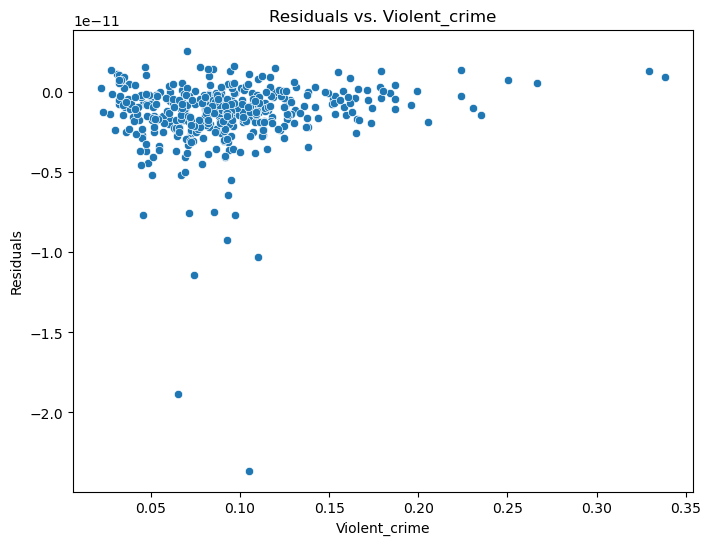

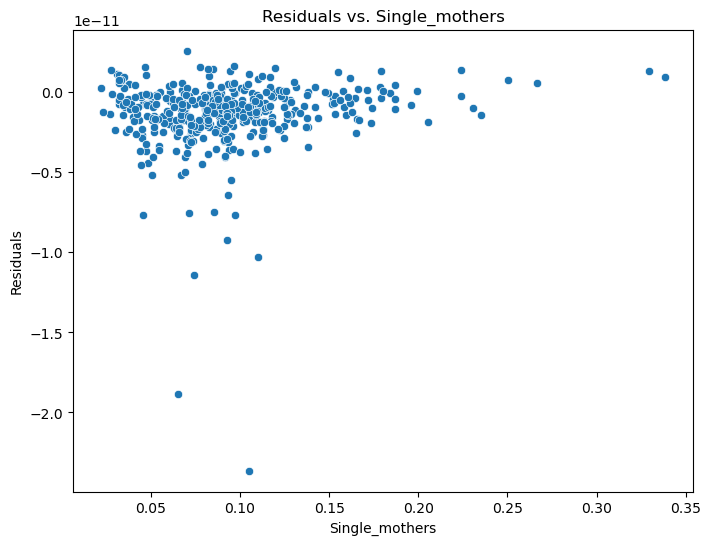

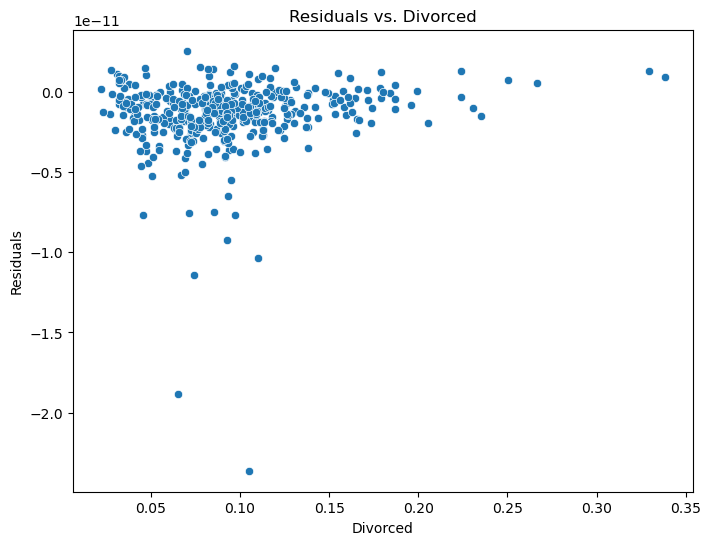

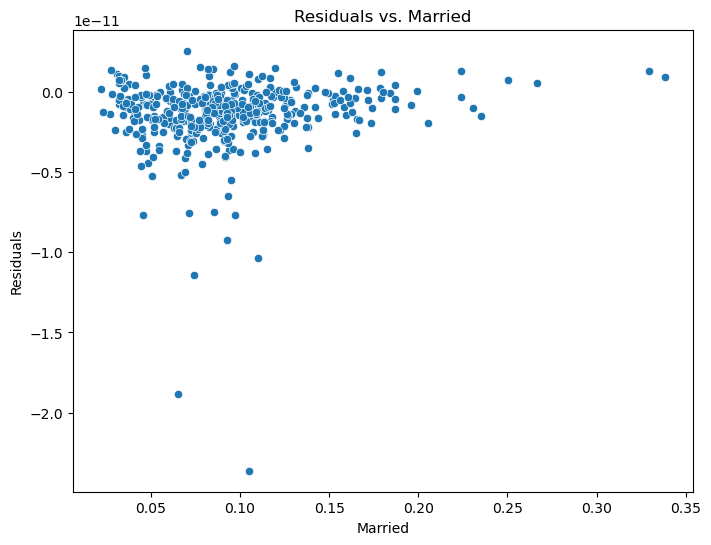

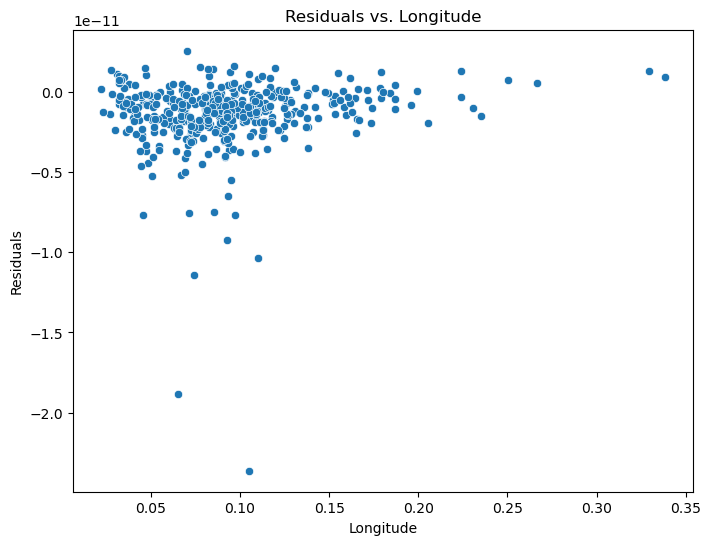

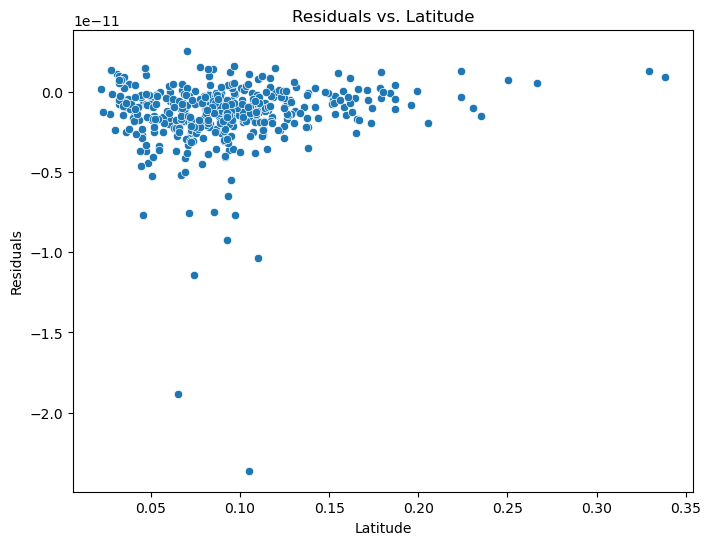

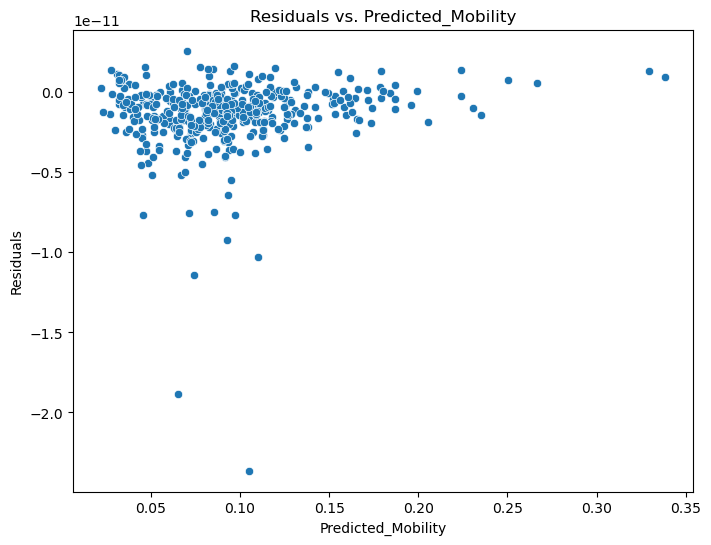

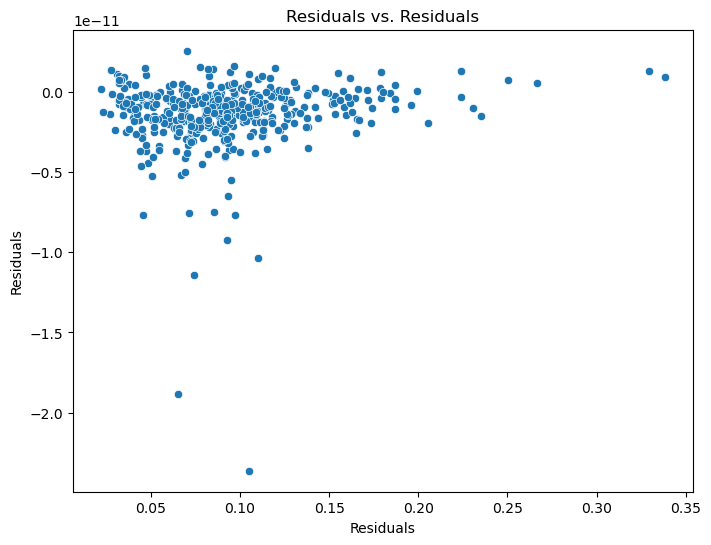

In [6]:
# Residual plots for each predictor variable
for col in X.columns:
    plt.figure(figsize=(8, 6))
    #sns.scatterplot(x=X[col], y=residuals)
    sns.scatterplot(x=model.predict(X), y=df['Residuals'])
    plt.title(f'Residuals vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Residuals')
    plt.show()